# <span style='color:blue'> CDS 522 Text and Speech Analytics Project : </span>
## <span style='color:blue'> Text Analytics for Suicidal Thoughts </span>

**Prepared by: 
Chin Yi Xiang,
Ling Hui Ting**

# Exploratory Data Analysis

* Token length in each Transcript
* Frequency of POS tag use in Suicidal Notes
* N-gram
* Top words used in Suicidal Notes
* WordCloud

## Importing required packages and Defining helper functions

### Packages

In [47]:
# import required packages
#warnings :)
import warnings
warnings.filterwarnings('ignore')

# for df purpose
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()

# for text processing
import nltk
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# for graph plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pip install Pillow
from PIL import Image

# for storing intermediate results
import pickle

# for notebook function
from IPython.display import display, clear_output
import time

### Helper Functions

In [48]:
def print_bold(text):
    text_bold = '\x1b[1;30;47m'+text+ '\x1b[0m'
    print(text_bold)
def glance(x,n=5):
    try:
        iterator = iter(x)
    except:
        print(x)
        return
    else:
        if type(x) == str or len(str(x)) <= 50:
            print(x)
            return
        if type(x) == dict:
            iterator = x.items()
        i = 0
        for ele in iterator:
            if i >= n:
                break
            glance(ele,n)
            i += 1

## Transcript's Length

In [49]:
# Each transcript length
tokens = pd.read_pickle('pickles/df_clean.pkl')
df = pd.DataFrame({'tokens':tokens})
df['count'] = df['tokens'].apply(len)
df.head(5)

,tokens,count
0,"[fucking, hate, holiday, season, first, thanks...",47
1,"[dm, add, discord, want, help, talk, cofactor]",7
2,"[nearly, always, battled, depression, got, old...",203
3,"[future, nothing, impenetrable, fog, look, bac...",31
4,"[always, fighting, sister, always, lash, mom, ...",27


Text(0.5, 1.0, 'Posts Length')

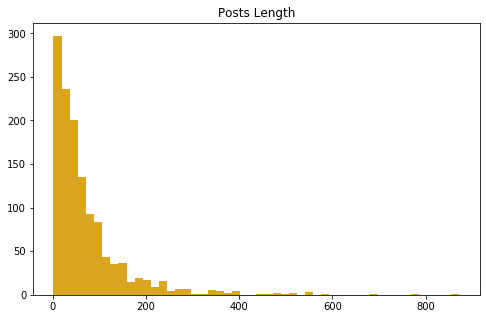

In [50]:
# Transcript's length histogram
plt.figure(figsize=(8,5))
plt.hist(df['count'], bins=50, color='goldenrod')
plt.title("Posts Length")

In [51]:
short_posts_percent = (df['count'] <= 200).sum() / len(df['count'])
print('Percentage of Posts less than 200 tokens: {0:.0%}'.format(short_posts_percent))

Percentage of Posts less than 200 tokens: 94%


## Frequency POS tag used in Suicidal Notes

### Details

For POS tagging, there are 8 main categories:
* Nouns
* Pronouns
* Verbs
* Adjectives
* Adverbs
* Conjunctions
* Interjections
* Propositions

We are particularly interested in Nouns, Adjectives, Verbs and Adverbs only. Hence, in this project, the remaining 4 POS will be chunk in to the category "Others"

Reference: http://www.butte.edu/departments/cas/tipsheets/grammar/parts_of_speech.html

### Tagging and Counting

#### Tagger and Counter Functions

In [52]:
def tagger(tokens):
    pos_tag = nltk.pos_tag # function that tags words by their part of speech (POS)
    tag_dict = {"J": 'JJ',
                "N": 'NN',
                "V": 'VB',
                "R": 'RB'}
    tagged_list = pos_tag(tokens)
    return [(token, tag_dict.get(tag[0], tag)) for (token, tag) in tagged_list]
def count_tags(tagged_tokens):
    tag_count = {}
    for word, tag in tagged_tokens:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)

#### Apply Tagger and Counter

In [53]:
print_bold('POS Tagging...')
df['pos'] = df['tokens'].progress_apply(tagger)
print_bold('Counting POS Tags in each post...')
df['pos_count'] = df['pos'].progress_apply(count_tags)
df[['pos','pos_count']].head(5)

POS Tagging...



Counting POS Tags in each post...


,pos,pos_count
0,"[(fucking, VB), (hate, NN), (holiday, NN), (se...","{'VB': 12, 'NN': 18, 'RB': 6, 'JJ': 7, 'MD': 3..."
1,"[(dm, NN), (add, VB), (discord, NN), (want, VB...","{'NN': 4, 'VB': 3}"
2,"[(nearly, RB), (always, RB), (battled, VB), (d...","{'RB': 27, 'VB': 45, 'NN': 81, 'JJ': 35, 'IN':..."
3,"[(future, JJ), (nothing, NN), (impenetrable, J...","{'JJ': 9, 'NN': 14, 'VB': 4, 'RB': 2, 'IN': 1,..."
4,"[(always, RB), (fighting, VB), (sister, NN), (...","{'RB': 7, 'VB': 3, 'NN': 11, 'JJ': 5, 'IN': 1}"


#### Separate each post into different tags

In [54]:
def get_tokens_pos(tagged_tokens,match_tag):
    return [token for (token, tag) in tagged_tokens if tag == match_tag]
tag_set = set(df['pos'].apply(lambda x: [tag for (token, tag) in x]).sum())
for tag in tag_set:
    df[tag] = df['pos'].apply(lambda x: get_tokens_pos(x,tag))
df[tag_set].head(5)

,CC,FW,VB,EX,IN,WRB,DT,POS,TO,UH,PRP,PRP$,CD,MD,WDT,RB,JJ,NN,WP$,WP
0,[],[],"[fucking, thanksgiving, thankful, fucking, die...",[],[],[],[],[],[],[],[],[],[one],"[would, would, could]",[],"[first, already, actually, back, shitty, really]","[thankful, next, nice, new, new, wish, fucking]","[hate, holiday, season, nothing, everyone, hat...",[],[]
1,[],[],"[add, want, talk]",[],[],[],[],[],[],[],[],[],[],[],[],[],[],"[dm, discord, help, cofactor]",[],[]
2,[],[],"[battled, got, starting, start, felt, validate...",[],"[like, wind, like, as, like, though, like, lik...",[],[another],[],[],[],[],[],[],"[could, may, ca, ca]",[whatever],"[nearly, always, late, also, always, rather, a...","[older, insight, ssri, possible, terrified, si...","[depression, deal, anxiety, therapy, way, lowe...",[],[]
3,[],[],"[look, come, take, give]",[],[like],[],[],[],[],[],[],[],[one],[],[],"[back, ever]","[future, impenetrable, happy, distant, unable,...","[nothing, fog, time, memory, picture, feeling,...",[],[]
4,[],[],"[fighting, keeping, going]",[],[nt],[],[],[],[],[],[],[],[],[],[],"[always, always, really, always, nt, suicide, ...","[lash, wrong, bad, fault, matter]","[sister, mom, anything, today, fight, somehow,...",[],[]


#### Count POS tags in whole data set

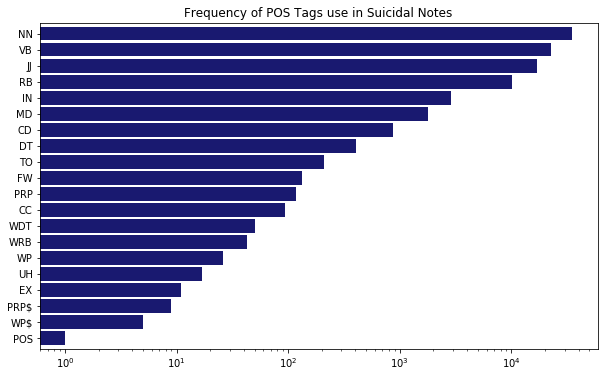

In [55]:
title = 'Frequency of POS Tags use in Suicidal Notes'
pos_counts = pd.DataFrame()
for tag in tag_set:
    pos_counts[tag] = df[tag].apply(len)
pos_counts[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(10,6), title=title, width=0.85, color='midnightblue')

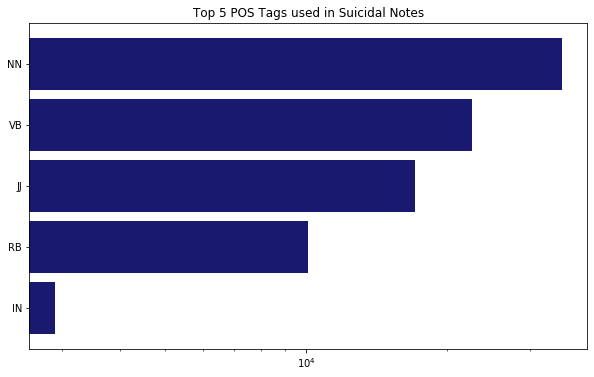

In [56]:
title = 'Top 5 POS Tags used in Suicidal Notes'
pos_counts[tag_set].sum().sort_values().tail(5).plot(kind='barh', logx=True, figsize=(10,6), title=title, width=0.85, color='midnightblue')

#### Collect tokens with same POS tags

In [57]:
pos_word_count = {}

def update_post_word_count(tag,token):
    if type(token) != str:
        if len(token) > 0:
            for t in token:
                update_post_word_count(tag,t)
        else:
            pass
    elif tag not in pos_word_count:
        pos_word_count[tag] = {}
    elif token not in pos_word_count[tag]:
        pos_word_count[tag][token] = 1
    else:
        pos_word_count[tag][token] += 1
    
for tag in tag_set:
    df[tag].apply(lambda x: update_post_word_count(tag,x))
    temp_df = pd.DataFrame.from_dict(pos_word_count[tag],orient='index',columns=['count'])
    size = 100
    temp_df = temp_df.sort_values('count').tail(size)
    pos_word_count[tag] = temp_df['count'].to_dict()
    
print_bold('5 samples from each POS')
for tag in tag_set:
    print(tag)
    glance(pos_word_count[tag],5)
# to use, for example of NN, pos_word_count['NN']

5 samples from each POS
CC
('nerve', 1)
('sloth', 1)
('love', 1)
('niece', 1)
('yet', 1)
FW
('queer', 1)
('gotten', 1)
('stressor', 1)
('le', 1)
('explain', 1)
VB
('deserve', 37)
('please', 37)
('ended', 38)
('supposed', 39)
('wake', 39)
EX
{'ton': 1, 'there': 9}
IN
('worthless', 1)
('of', 1)
('aide', 1)
('until', 1)
('eventough', 1)
WRB
('why', 1)
('work', 1)
('write', 1)
('when', 2)
('wan', 6)
DT
('need', 1)
('that', 1)
('nt', 1)
('themwhat', 1)
('hall', 1)
POS
{}
TO
{'na': 209}
UH
{'yeah': 1, 'yes': 7, 'oh': 8}
PRP
('ocean', 1)
('them', 1)
('od', 1)
('heroin', 1)
('delf', 1)
PRP$
('father', 1)
('its', 1)
('mother', 1)
('their', 2)
('your', 3)
CD
('mom', 1)
('host', 1)
('le', 1)
('hotline', 1)
('zombie', 1)
MD
('ought', 1)
('will', 1)
('can', 1)
('overdose', 1)
('olanzapin', 1)
WDT
('soanxiousthat', 1)
('toowhat', 1)
('groupchat', 1)
('weird', 1)
('walmart', 1)
RB
('hopefully', 13)
('nowhere', 13)
('best', 13)
('fully', 13)
('understand', 13)
JJ
('low', 30)
('wan', 30)
('free', 30)
(

In [58]:
NN = pos_word_count['NN']
sorted_NN = dict(sorted(NN.items(), key=lambda x: (x[1],x[0]),reverse=True))

JJ = pos_word_count['JJ']
sorted_JJ = dict(sorted(JJ.items(), key=lambda x: (x[1],x[0]),reverse=True))

RB = pos_word_count['RB']
sorted_RB = dict(sorted(RB.items(), key=lambda x: (x[1],x[0]),reverse=True))

VB = pos_word_count['VB']
sorted_VB = dict(sorted(VB.items(), key=lambda x: (x[1],x[0]),reverse=True))

IN = pos_word_count['IN']
sorted_IN = dict(sorted(IN.items(), key=lambda x: (x[1],x[0]),reverse=True))

tag_set=['NN','JJ','RB','VB','IN']

## N-Grams

In [59]:
# generate ngram
def generate_ngrams(text, n=2):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
        yield words[i:i + n]
        
text = pd.read_pickle('pickles/df_clean.pkl').apply(lambda x: ' '.join(x))
text

0       fucking hate holiday season first thanksgiving...
1                  dm add discord want help talk cofactor
2       nearly always battled depression got older sta...
3       future nothing impenetrable fog look back time...
4       always fighting sister always lash mom nt anyt...
                              ...                        
1293    since felt depressed almost took life went awa...
1294    nt know reaching time seem appropriate since t...
1295    dont believe afterlife stay night fear afterli...
1296    nt think actually kill thats scared nt want th...
1297    wan na die badly everytim hear someone else su...
Name: text, Length: 1283, dtype: object

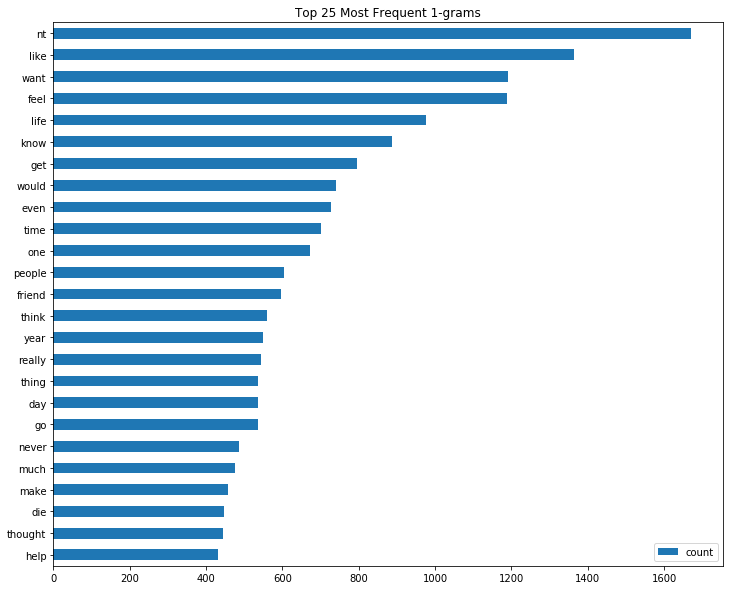

In [60]:
# Unigram
n = 1       
ngrams = {}
for x in text:
    for ngram in generate_ngrams(x, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_1 = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_1.columns = ['count']
size = 25
title = 'Top {} Most Frequent {}-grams'.format(size, n)
ngrams_1.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

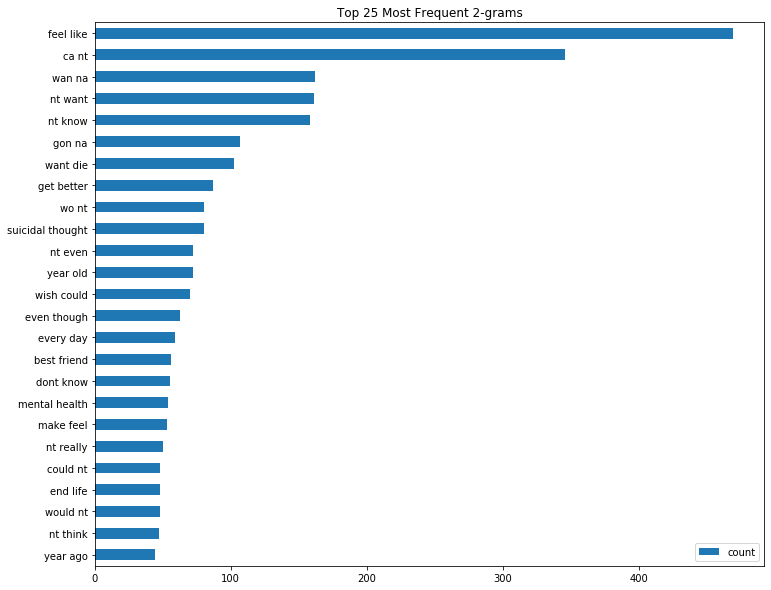

In [61]:
#bigram
n = 2       
ngrams = {}
for x in text:
    for ngram in generate_ngrams(x, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_2 = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_2.columns = ['count']
size = 25
title = 'Top {} Most Frequent {}-grams'.format(size, n)
ngrams_2.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)


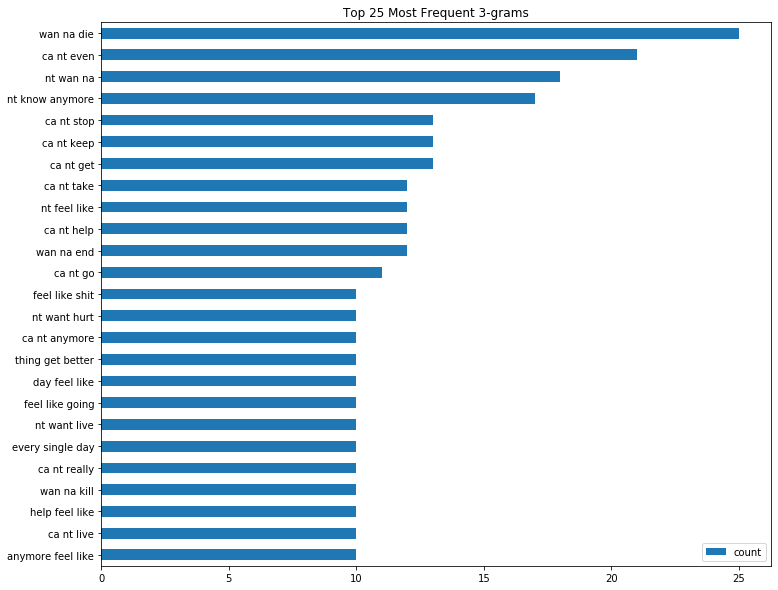

In [62]:
# trigram
n = 3       
ngrams = {}
for x in text:
    for ngram in generate_ngrams(x, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_3 = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_3.columns = ['count']
size = 25
title = 'Top {} Most Frequent {}-grams'.format(size, n)
ngrams_3.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)


## Top 30 words by each Transcript 

In [63]:
data = pd.read_pickle('pickles/dtm.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Find the top 30 words by each transcript
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

glance(top_dict,5)

0
('fucking', 5)
('hate', 4)
('year', 3)
('die', 2)
('new', 2)
1
('talk', 1)
('discord', 1)
('add', 1)
('cofactor', 1)
('want', 1)
2
('like', 6)
('day', 3)
('car', 3)
('nt', 3)
('time', 3)
3
('moment', 1)
('outlet', 1)
('like', 1)
('time', 1)
('relief', 1)
4
('nt', 2)
('suicide', 1)
('sister', 1)
('lash', 1)
('really', 1)


In [65]:
# pull out the top 30 words for each text
words = []
for index in data.columns:
    top = [word for (word, count) in top_dict[index]]
    for t in top:
        words.append(t)

glance(words,10)

fucking
hate
year
die
new
thankful
day
time
despair
start


## Wordclouds

### Full Text Wordcloud

In [66]:
wc = WordCloud(background_color="white", colormap="Dark2",max_words=500,
               max_font_size=150) #, random_state=42)

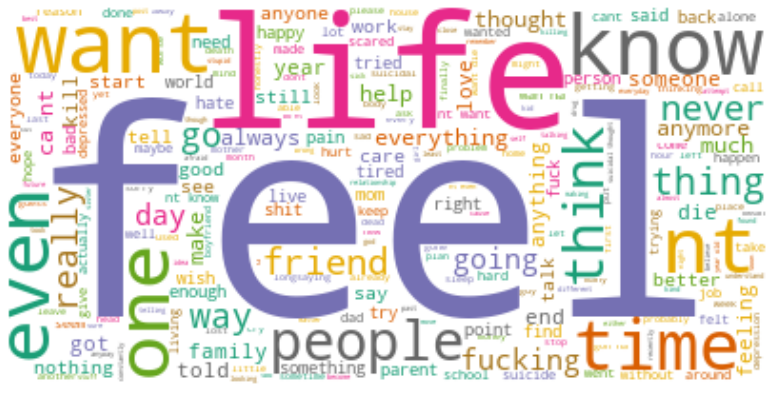

In [67]:
# Full texts
flat_list = ' '.join(df['tokens'].apply(lambda x: ' '.join(x))).split()
wc.generate(' '.join(flat_list))

# make figure to plot
plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

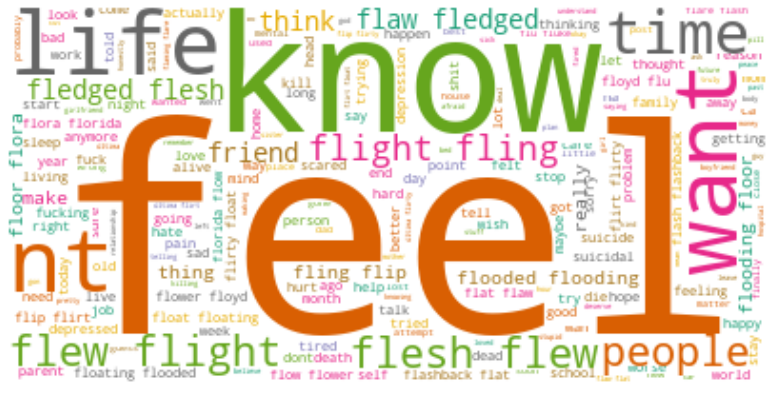

In [68]:
wc.generate(' '.join(words))

# make figure to plot
plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Uni-gram Wordcloud

In [69]:
# Open the mask drawing
suicide_mask = np.array(Image.open("img/suicide1.png"))
thoughts_mask = np.array(Image.open("img/thoughts.png"))


In [70]:
frequencies = Counter(flat_list).most_common()

def listToDict(lstTup):
    bag_of_words = dict(lstTup)
    return bag_of_words

freq =listToDict(frequencies)
print(pd.DataFrame.from_dict(freq,orient='index'))

                 0
nt            1671
like          1363
want          1191
feel          1188
life           976
...            ...
radical          1
aggressively     1
mediator         1
farm             1
bust             1

[7170 rows x 1 columns]


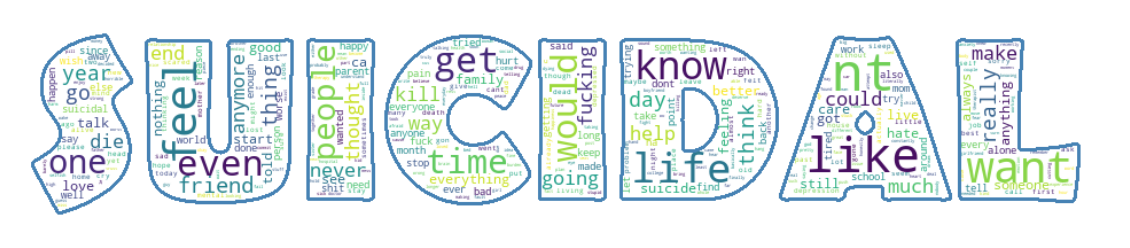

<Figure size 432x288 with 0 Axes>

In [71]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=suicide_mask,
               contour_width=2, contour_color='steelblue')

# Generate a wordcloud
wc.generate_from_frequencies(freq)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.savefig('suicide_blue.png')

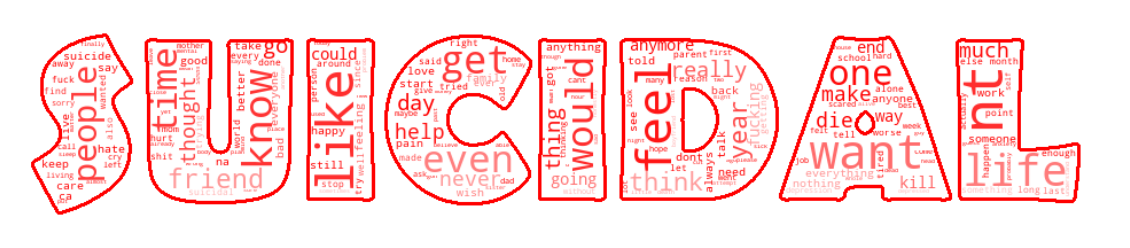

In [72]:
from wordcloud import WordCloud

image_colors = ImageColorGenerator(suicide_mask)
wc = WordCloud(background_color="white", max_words=1000, mask=suicide_mask, 
               contour_width=3, contour_color='red', max_font_size = 50)

wc.generate_from_frequencies(freq)
plt.figure(figsize=[20,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig('suicide_red.png')

### Bi-gram Wordcloud

In [73]:
# transpose dataframe and convert to dictionary
bi_grams =ngrams_2.T.to_dict('list')

# replace bigram delimiter " " with "_"
bi_gram = {k.replace(' ', '_'): v for k, v in bi_grams.items()}
#bi_gram

# sorted descending values
sorted_bi = dict(sorted(bi_gram.items(), key=lambda x: (x[1],x[0]),reverse=True))
glance(sorted_bi,10)

('feel_like', [469])
('ca_nt', [346])
('wan_na', [162])
('nt_want', [161])
('nt_know', [158])
('gon_na', [107])
('want_die', [102])
('get_better', [87])
('wo_nt', [80])
('suicidal_thought', [80])


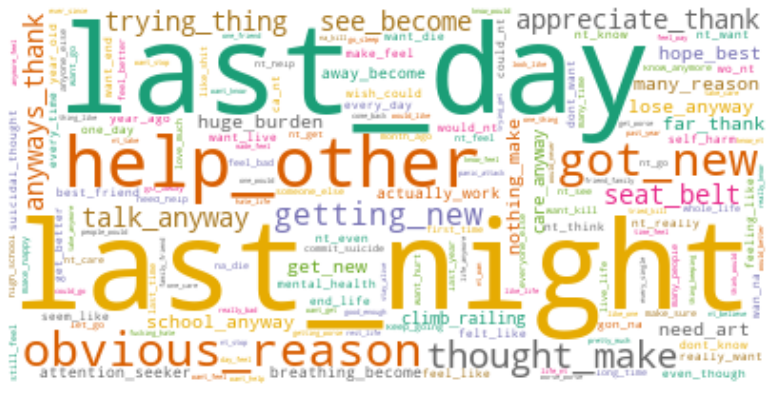

In [74]:
# Create a word cloud image
wc = WordCloud(background_color="white", colormap="Dark2",max_words=500,
               max_font_size=150) #, random_state=42)

# Generate a wordcloud
wc.generate(' '.join(sorted_bi))

# show
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.savefig('outputs/bigram_wordcloud.png')

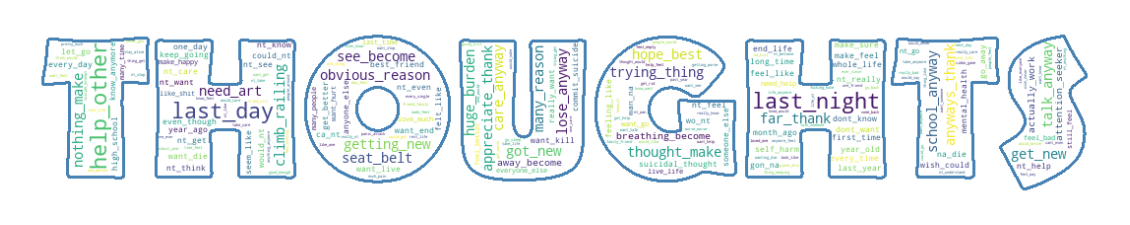

In [75]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=200, mask=thoughts_mask,
               contour_width=2, contour_color='steelblue')

# Generate a wordcloud
wc.generate(' '.join(sorted_bi))

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.savefig('outputs/thoughts_blue.png')

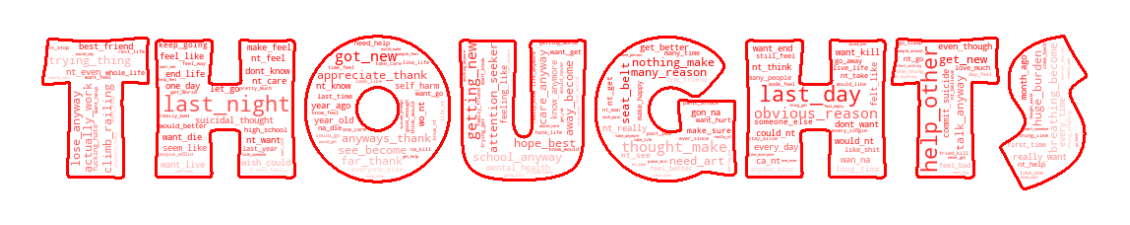

In [76]:
image_colors = ImageColorGenerator(thoughts_mask)
wc = WordCloud(background_color="white", max_words=200, mask=thoughts_mask, 
               contour_width=3, contour_color='red', max_font_size = 50)

wc.generate(' '.join(sorted_bi))
plt.figure(figsize=[20,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig('outputs/thought_red.png')


### POS Tagging Wordcloud

In [77]:
max(pos_counts[tag_set].sum())

35100

In [78]:
#generate wordclouds for each tag
max_count = max(pos_counts[tag_set].sum())
for tag in tag_set:
    tag_width = pos_counts[tag].sum() / max_count
    wc = WordCloud(background_color="white", max_words=50,
               contour_width=2, contour_color='navy',max_font_size=50, width=int(800*tag_width), height=200)
    wc.generate(' '.join(globals()['sorted_'+tag]))
    fig, ax = plt.subplots(figsize=(20*tag_width,10))
    for spine in ax.spines:
#         print(spine,type(spine))
        ax.spines[spine].set_linewidth(5)
    plt.imshow(wc, interpolation="bilinear")    
    plt.xticks([], [])
    plt.yticks([],[])
    fig.tight_layout(pad=0)
    fig.savefig('outputs/%s_wordcloud.png'%tag,bbox_inches='tight',pad_inches=0)
    plt.close()

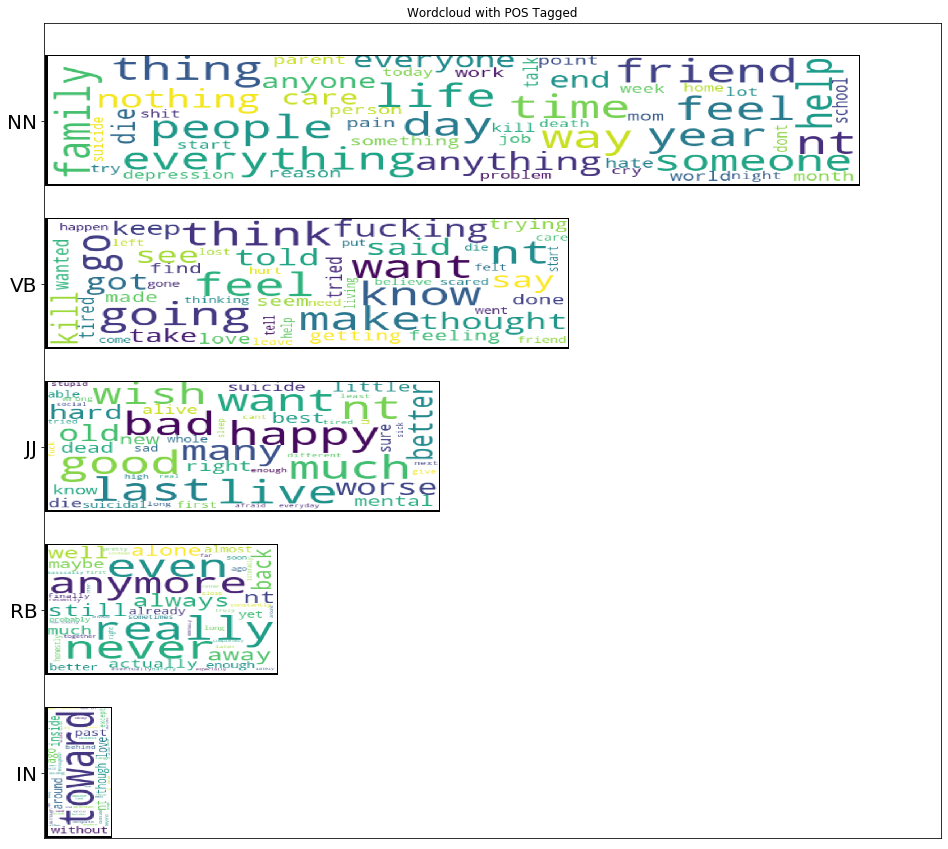

In [79]:
def image_plot(points, images, spacing=1, bar_width=1, width=20, height=10, labels=None, wh_ratio=1):
    # Iterate through images and data, autoscaling the width to
    # the aspect ratio of the image
    plt.figure(figsize=[width,height])
    size = len(points)*(spacing + bar_width)
    for i, (point, img) in enumerate(zip(points, images)):
        AR = img.shape[1] / img.shape[0]
        bottom = bar_width*i + spacing*i
        top = bottom + bar_width
        plt.imshow(img, extent=[0, point/max(points)*size*wh_ratio, bottom, top], interpolation=None)
    # Set x,y limits on plot window
    if labels:
        yticks = list(np.arange(0.5*bar_width,size,bar_width+spacing))
        plt.yticks(ticks=yticks,labels=labels,fontsize=20)
        plt.xticks([],[])
    plt.xlim(0, size*wh_ratio*1.1)
    plt.ylim(0, size)

# Read in wordcloud images
labels = pos_counts[tag_set].sum().sort_values().index.to_list()
images = [np.array(Image.open('outputs/%s_wordcloud.png'%tag)) for tag in labels]

# Get data from pos_counts
data = pos_counts[tag_set].sum().sort_values().to_list()

image_plot(data, images, spacing=1, bar_width=4, width=30, height=15, labels=labels, wh_ratio=1)
plt.title('Wordcloud with POS Tagged')
plt.savefig('outputs/pos_wordcloud.png')

## Organize and Save Intermediate Results

In [80]:
df.to_pickle('pickles/df_pos.pkl')

In [81]:
# User this line to save to html
!jupyter nbconvert --to html_ch --output-dir='.\html' "2. EDA.ipynb"

[NbConvertApp] Converting notebook 2. EDA.ipynb to html_ch
[NbConvertApp] Writing 2824124 bytes to .\html\2. EDA.html


# -----------------------------------------------END---------------------------------------------------------